# Import packages

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

def window_rms(a, window_size):
    a2 = np.power(a,2)
    window = np.ones(window_size)/float(window_size)
    return np.sqrt(np.convolve(a2, window, 'valid'))


# Load in processed data

In [118]:
import numpy as np

#specify, what file nr to read
subject = "ralf"

with open("./Processed_data/Cheek/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    cheek_array = result
    
with open("./Processed_data/Brow/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    brow_array = result
    
with open("./Processed_data/Decisions/{}".format(subject), 'rb') as file:
    meta = np.load(file)
    
    
#specify, what file nr to read
subject = "ralf_2"

with open("./Processed_data/Cheek/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    cheek_array = np.concatenate([cheek_array,result], axis=0)
    
with open("./Processed_data/Brow/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    brow_array =  np.concatenate([brow_array,result],axis=0)
    
with open("./Processed_data/Decisions/{}".format(subject), 'rb') as file:
    meta =  np.concatenate([meta,np.load(file)],axis=1)

    
#specify, what file nr to read
subject = "egert"

with open("./Processed_data/Cheek/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    cheek_array = np.concatenate([cheek_array,result], axis=0)

with open("./Processed_data/Brow/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    brow_array =  np.concatenate([brow_array,result],axis=0)
    
with open("./Processed_data/Decisions/{}".format(subject), 'rb') as file:
    meta = np.concatenate([meta,np.load(file)],axis=1)

### RMS

/home/egert/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


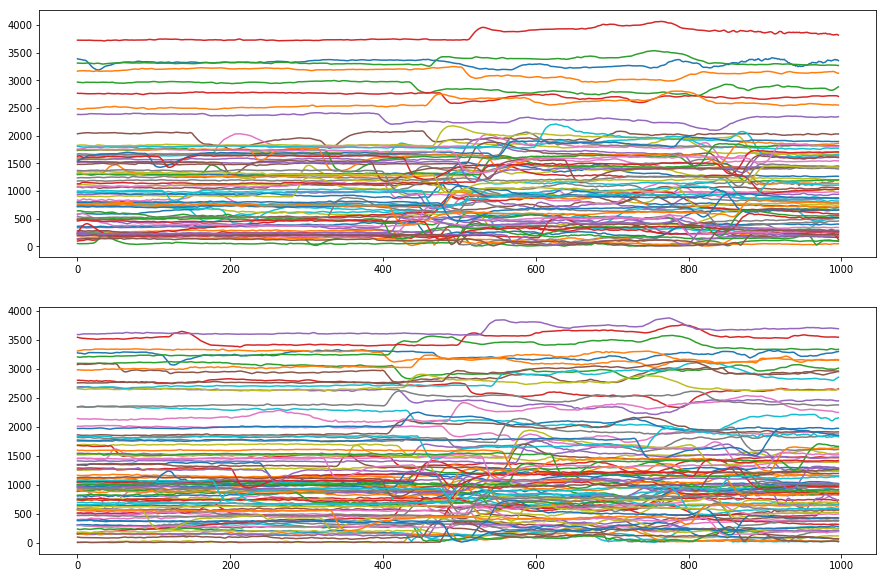

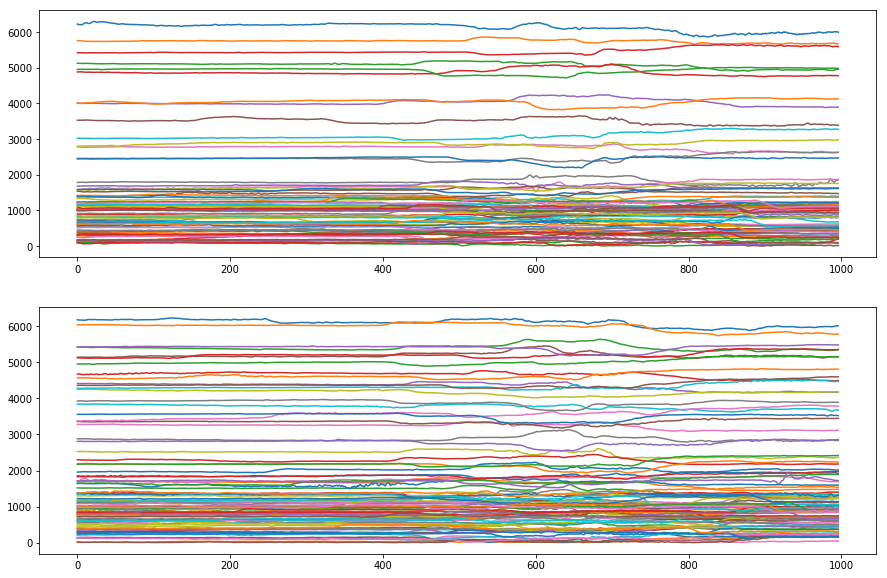

In [119]:
window_size = 5

cheek_array_rms = np.array([window_rms(ar,window_size) for ar in cheek_array])
cheek_array_rms.shape


brow_array_rms = np.array([window_rms(ar,window_size) for ar in brow_array])
cheek_array_rms.shape
fig, axes = plt.subplots(2,1, figsize=(15,10))


for ar in cheek_array_rms[meta[1],:]:
    axes[0].plot(ar)

for ar in cheek_array_rms[~meta[1],:]:
    axes[1].plot(ar)
fig.show()

fig, axes = plt.subplots(2,1, figsize=(15,10))
for ar in brow_array_rms[meta[1],:]:
    axes[0].plot(ar)

for ar in brow_array_rms[~meta[1],:]:
    axes[1].plot(ar)
fig.show()

In [134]:
X_rms = np.concatenate([cheek_array_rms[:,:,np.newaxis], brow_array_rms[:,:,np.newaxis]], axis=2)

### Convolutional network

In [135]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
y_binary = to_categorical(meta[1]*1)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [137]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization
import os
import random
import time


model = Sequential()

model.add(Conv1D(10, (3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

# model.add(Conv1D(64, (2)))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=(2)))

# model.add(Conv1D(64, (2)))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())

model.add(Dense(512))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
epochs = 10

model.fit(X_train, y_train,batch_size=1, epochs=epochs, validation_data=(X_test, y_test))
# score = model.evaluate(test_X, test_y, batch_size=batch_size)


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 995, 10)           70        
_________________________________________________________________
activation_27 (Activation)   (None, 995, 10)           0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 9950)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               5094912   
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 1026      
_________________________________________________________________
activation_28 (Activation)   (None, 2)                 0         
Total params: 5,096,008
Trainable params: 5,096,008
Non-trainable params: 0
___________________________________________